In [1]:
from tensorflow.keras.layers import Input, Dense, Flatten
from keras.applications.inception_v3 import InceptionV3 
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import keras
from glob import glob

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys, os

Using TensorFlow backend.


In [4]:
IMAGE_SIZE = [224, 224]

train_path = 'Dataset/training_set1'
valid_path = 'Dataset/testing_set1'
folders = glob('Dataset/training_set1/*')

In [5]:
base_model = InceptionV3(weights='imagenet', include_top=False)
x = base_model.output
x = keras.layers.GlobalAveragePooling2D()(x)
x = keras.layers.Dense(1024, activation='relu')(x)
x = keras.layers.BatchNormalization()(x)
predictions = keras.layers.Dense(len(folders), activation='softmax')(x)
model = keras.models.Model(inputs=base_model.inputs, outputs=predictions)

for layer in base_model.layers:
  layer.trainable = False
  
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, None, None, 3 0                                            
__________________________________________________________________________________________________
conv2d_95 (Conv2D)              (None, None, None, 3 864         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization_96 (BatchNo (None, None, None, 3 96          conv2d_95[0][0]                  
__________________________________________________________________________________________________
activation_95 (Activation)      (None, None, None, 3 0           batch_normalization_96[0][0]     
____________________________________________________________________________________________

In [6]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [7]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('Dataset/training_set1',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory('Dataset/test_set1',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')


# fit the model
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=5,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)
# loss

Found 1560 images belonging to 2 classes.
Found 365 images belonging to 2 classes.
Epoch 1/5
49/49 [==============================] - 579s 12s/step - loss: 0.5453 - accuracy: 0.8077 - val_loss: 0.3608 - val_accuracy: 0.8767
Epoch 2/5
49/49 [==============================] - 542s 11s/step - loss: 0.1363 - accuracy: 0.9487 - val_loss: 1.1273 - val_accuracy: 0.8767
Epoch 3/5
49/49 [==============================] - 545s 11s/step - loss: 0.0786 - accuracy: 0.9686 - val_loss: 2.0806e-05 - val_accuracy: 0.8767
Epoch 4/5
49/49 [==============================] - 459s 9s/step - loss: 0.0796 - accuracy: 0.9737 - val_loss: 1.3989 - val_accuracy: 0.8822
Epoch 5/5
49/49 [==============================] - 228s 5s/step - loss: 0.0725 - accuracy: 0.9737 - val_loss: 1.2086 - val_accuracy: 0.8767


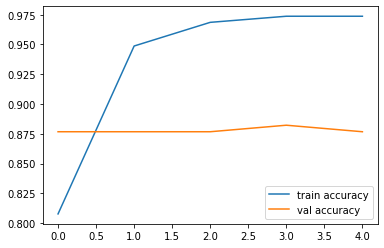

<Figure size 432x288 with 0 Axes>

In [10]:
plt.plot(r.history['accuracy'], label='train accuracy')
plt.plot(r.history['val_accuracy'], label='val accuracy')
plt.legend()
plt.show() 
plt.savefig('AccVal_acc')

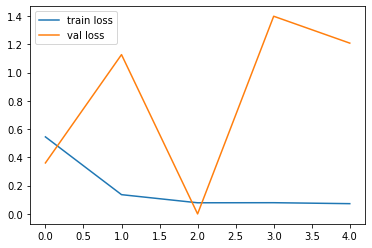

<Figure size 432x288 with 0 Axes>

In [12]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss') 